Projekt MNwS - Aleksander Folfas 411052

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Zadanie 1

Za pomocą odpowiednich symulacji porównać moce testu Shapiro-Wilka, testu Kołmogorowa i testu
𝜒2 (z hipotezą główną, że cecha ma rozkład normalny) w przypadku, gdy dane pochodzą z rozkładu
𝑡-Studenta (uwaga: żeby wyniki były porównywalne trzeba pamiętać o standaryzacji danych). Uzyskane wyniki należy przedstawić na odpowiednich wykresach
ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- liczby stopni swobody generowanego rozkładu t-Studenta 

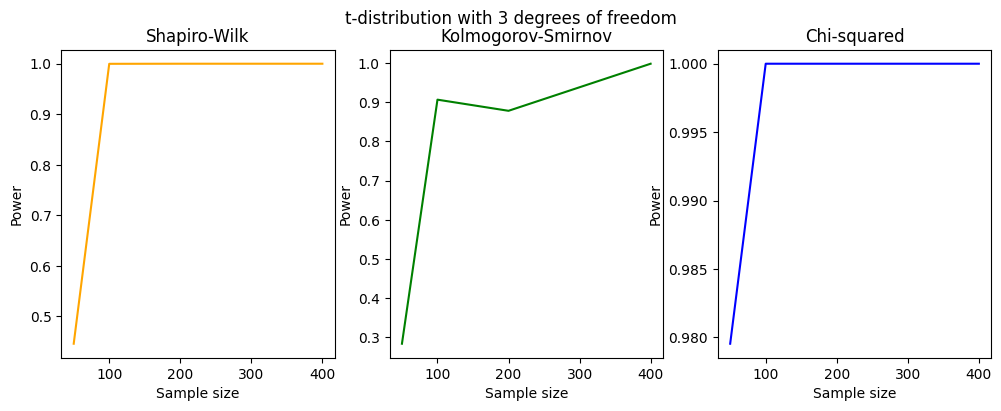

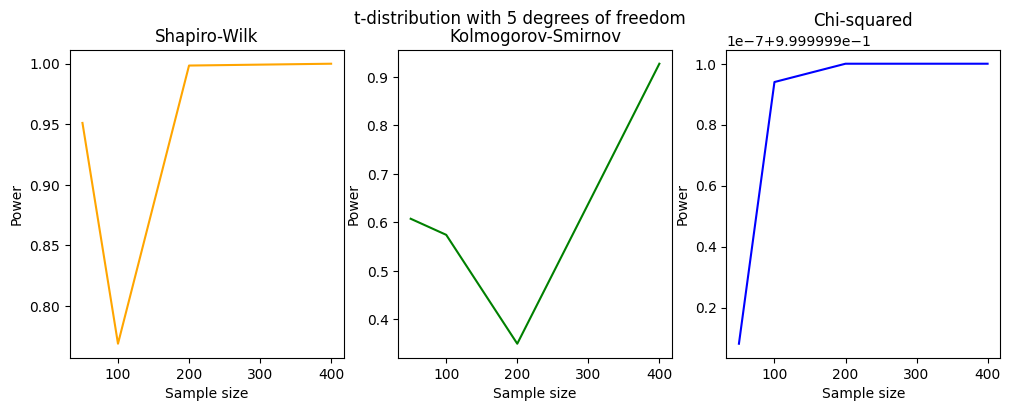

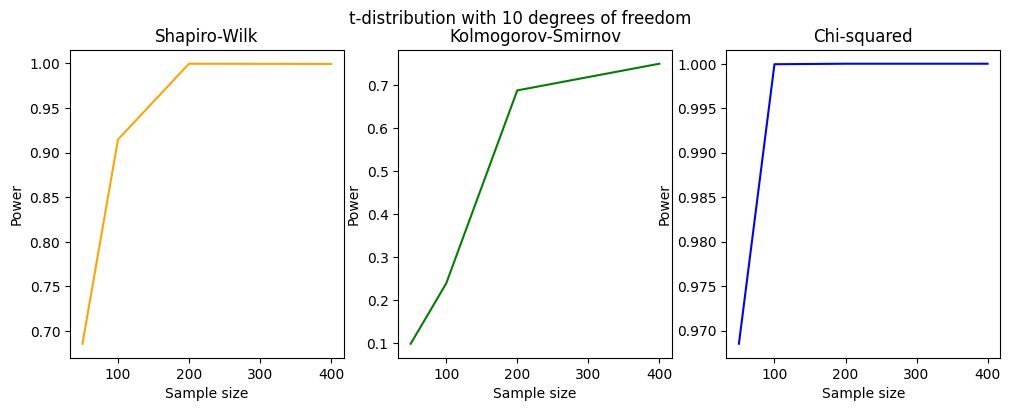

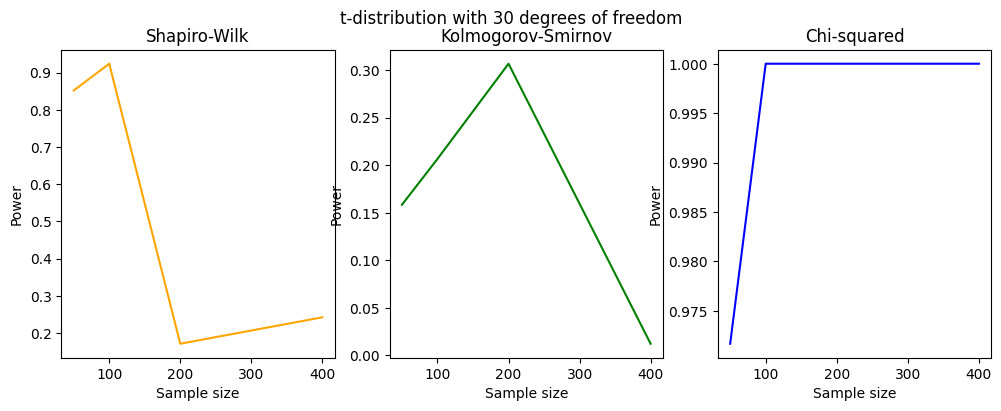

In [46]:
np.random.seed(42)

def simulate_powers(n_samples, df_values):
    powers = []
    n_tests = 3

    for df in df_values:
        df_powers = np.zeros((n_tests, len(n_samples)))

        for i, n in enumerate(n_samples):
            data = stats.t.rvs(df=df, size=n)
            data = (data - np.mean(data)) / np.std(data, ddof=1)

            # Shapiro-Wilk test
            _, sw_pval = stats.shapiro(data)
            sw_power = 1 - sw_pval
            df_powers[0, i] = sw_power

            # Kolmogorov-Smirnov test
            _, ks_pval = stats.kstest(data, 'norm')
            ks_power = 1 - ks_pval
            df_powers[1, i] = ks_power

            # Chi-squared test
            hist, _ = np.histogram(data, bins='auto', density=False)
            _, chi_pval = stats.chisquare(hist)
            chi_power = 1 - chi_pval
            df_powers[2, i] = chi_power

        powers.append(df_powers)

    return powers

n_samples = np.array([50, 100, 200, 400])
df_values = np.array([3, 5, 10, 30])

powers = simulate_powers(n_samples, df_values)

test_names = ['Shapiro-Wilk', 'Kolmogorov-Smirnov', 'Chi-squared']
colors = [ 'orange','green','blue']

for i, df in enumerate(df_values):
    fig, axes = plt.subplots(ncols=len(test_names), figsize=(12, 4))
    fig.suptitle(f't-distribution with {df} degrees of freedom')
    
    for j, test_name in enumerate(test_names):
        ax = axes[j]
        ax.set_title(test_name)
        ax.set_xlabel('Sample size')
        ax.set_ylabel('Power')
        ax.plot(n_samples, powers[i][j], colors[j])        
    plt.show()